##import necessary lib

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
flights=pd.read_csv('/content/flights.csv')
flights=flights.sample(n=100000)
flights.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
575094,2015,2,8,7,AA,1562,N4YDAA,RIC,DFW,650,...,850.0,-40.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
187717,2015,1,13,2,EV,5401,N873AS,ATL,CAE,815,...,906.0,-4.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
62050,2015,1,4,7,DL,1898,N822DN,ATL,IND,2200,...,2327.0,-8.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
267034,2015,1,18,7,OO,5179,N701SK,ASE,LAX,1410,...,1511.0,-10.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
165808,2015,1,11,7,US,896,N741UW,CLT,ROC,1805,...,1950.0,-1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
flights.shape

(100000, 31)

In [ ]:
flights.isnull().values.any()

True

In [ ]:
flights.isnull().sum()

,0
YEAR,0
MONTH,0
DAY,0
DAY_OF_WEEK,0
AIRLINE,0
FLIGHT_NUMBER,0
TAIL_NUMBER,754
ORIGIN_AIRPORT,0
DESTINATION_AIRPORT,0
SCHEDULED_DEPARTURE,0


<Axes: xlabel='CANCELLATION_REASON', ylabel='count'>

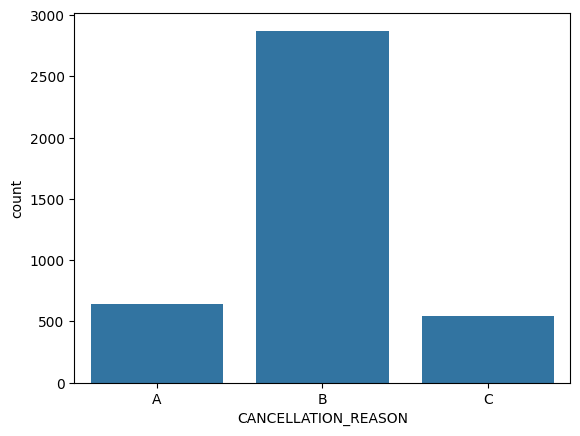

In [ ]:
sns.countplot(x='CANCELLATION_REASON',data=flights)

<Axes: xlabel='MONTH', ylabel='count'>

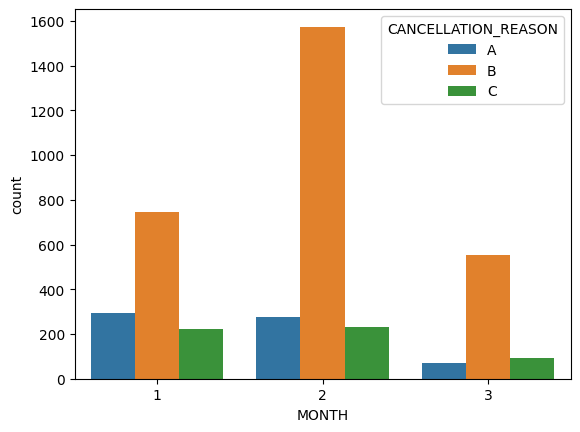

In [ ]:
sns.countplot(x="MONTH",hue="CANCELLATION_REASON",data=flights)

<ipython-input-70-e7b34b0eb7bb>:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axis.set_xticklabels(axis.get_xticklabels(), rotation=90, ha="right")


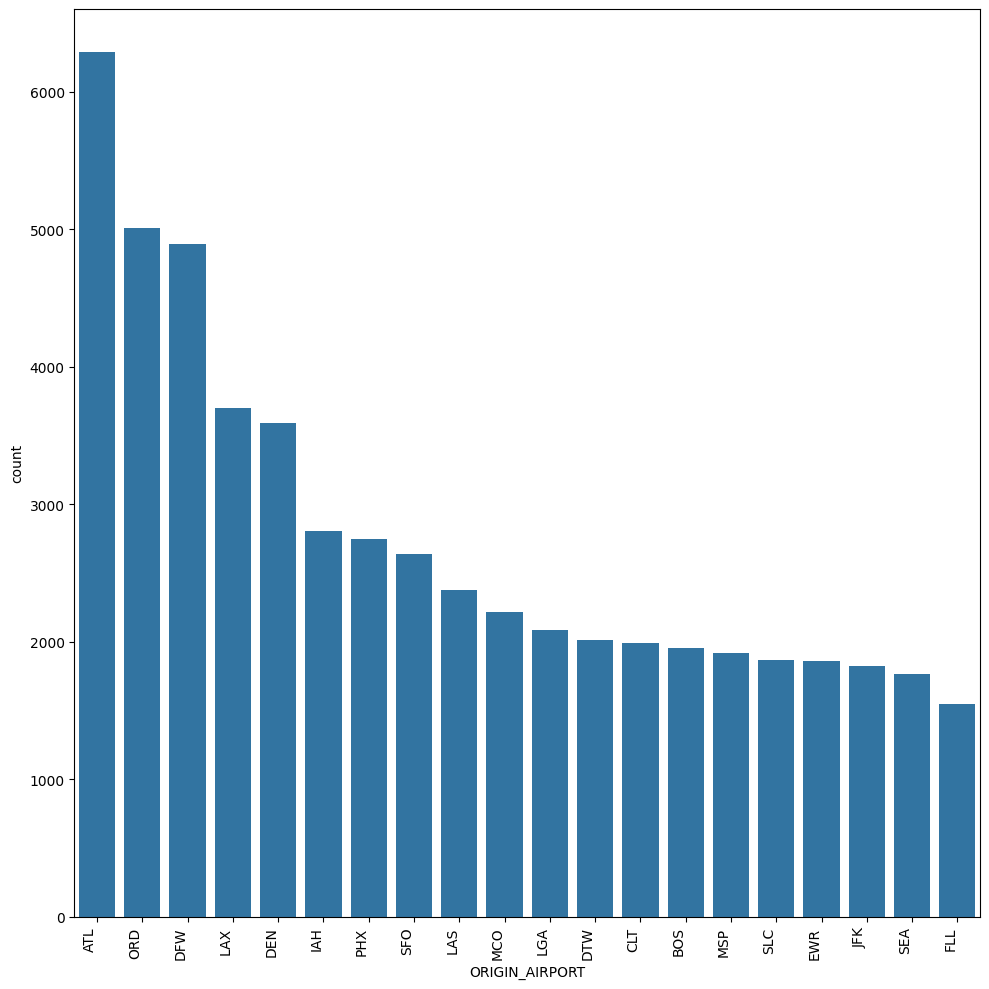

In [ ]:
plt.figure(figsize=(10, 10))
axis = sns.countplot(x=flights['ORIGIN_AIRPORT'], data =flights, order=flights['ORIGIN_AIRPORT'].value_counts().iloc[:20].index)
axis.set_xticklabels(axis.get_xticklabels(), rotation=90, ha="right")
plt.tight_layout()
plt.show()

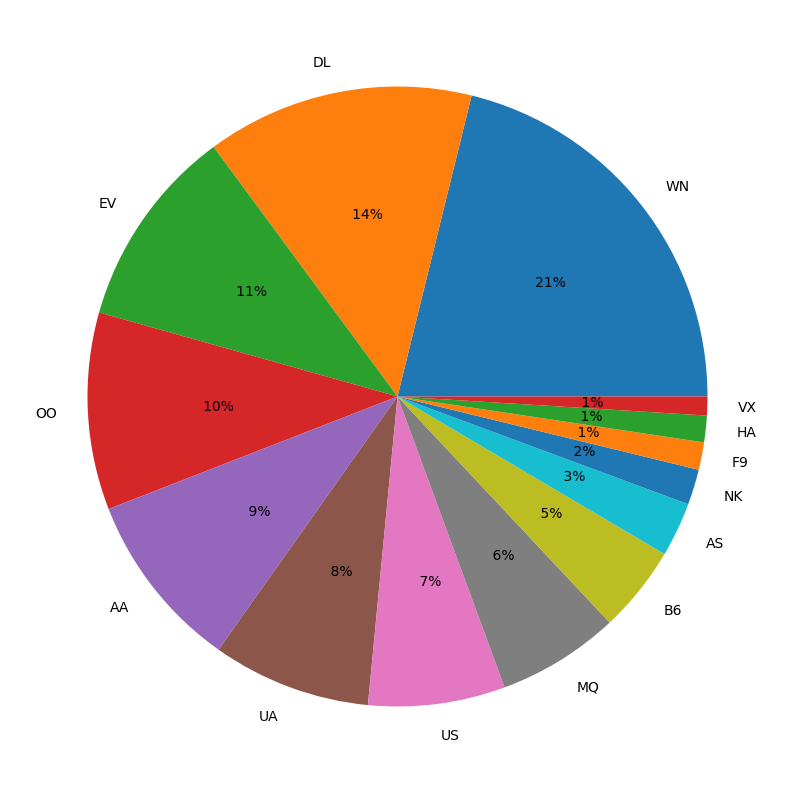

In [ ]:
axis = plt.subplots(figsize=(10,14))
# Get the unique airline names and their corresponding counts
# This ensures that both "Name" and "size" have the same length
size = flights["AIRLINE"].value_counts()
Name = size.index  # Get the index (airline names) from the size Series

plt.pie(size, labels=Name, autopct='%5.0f%%')
plt.show()

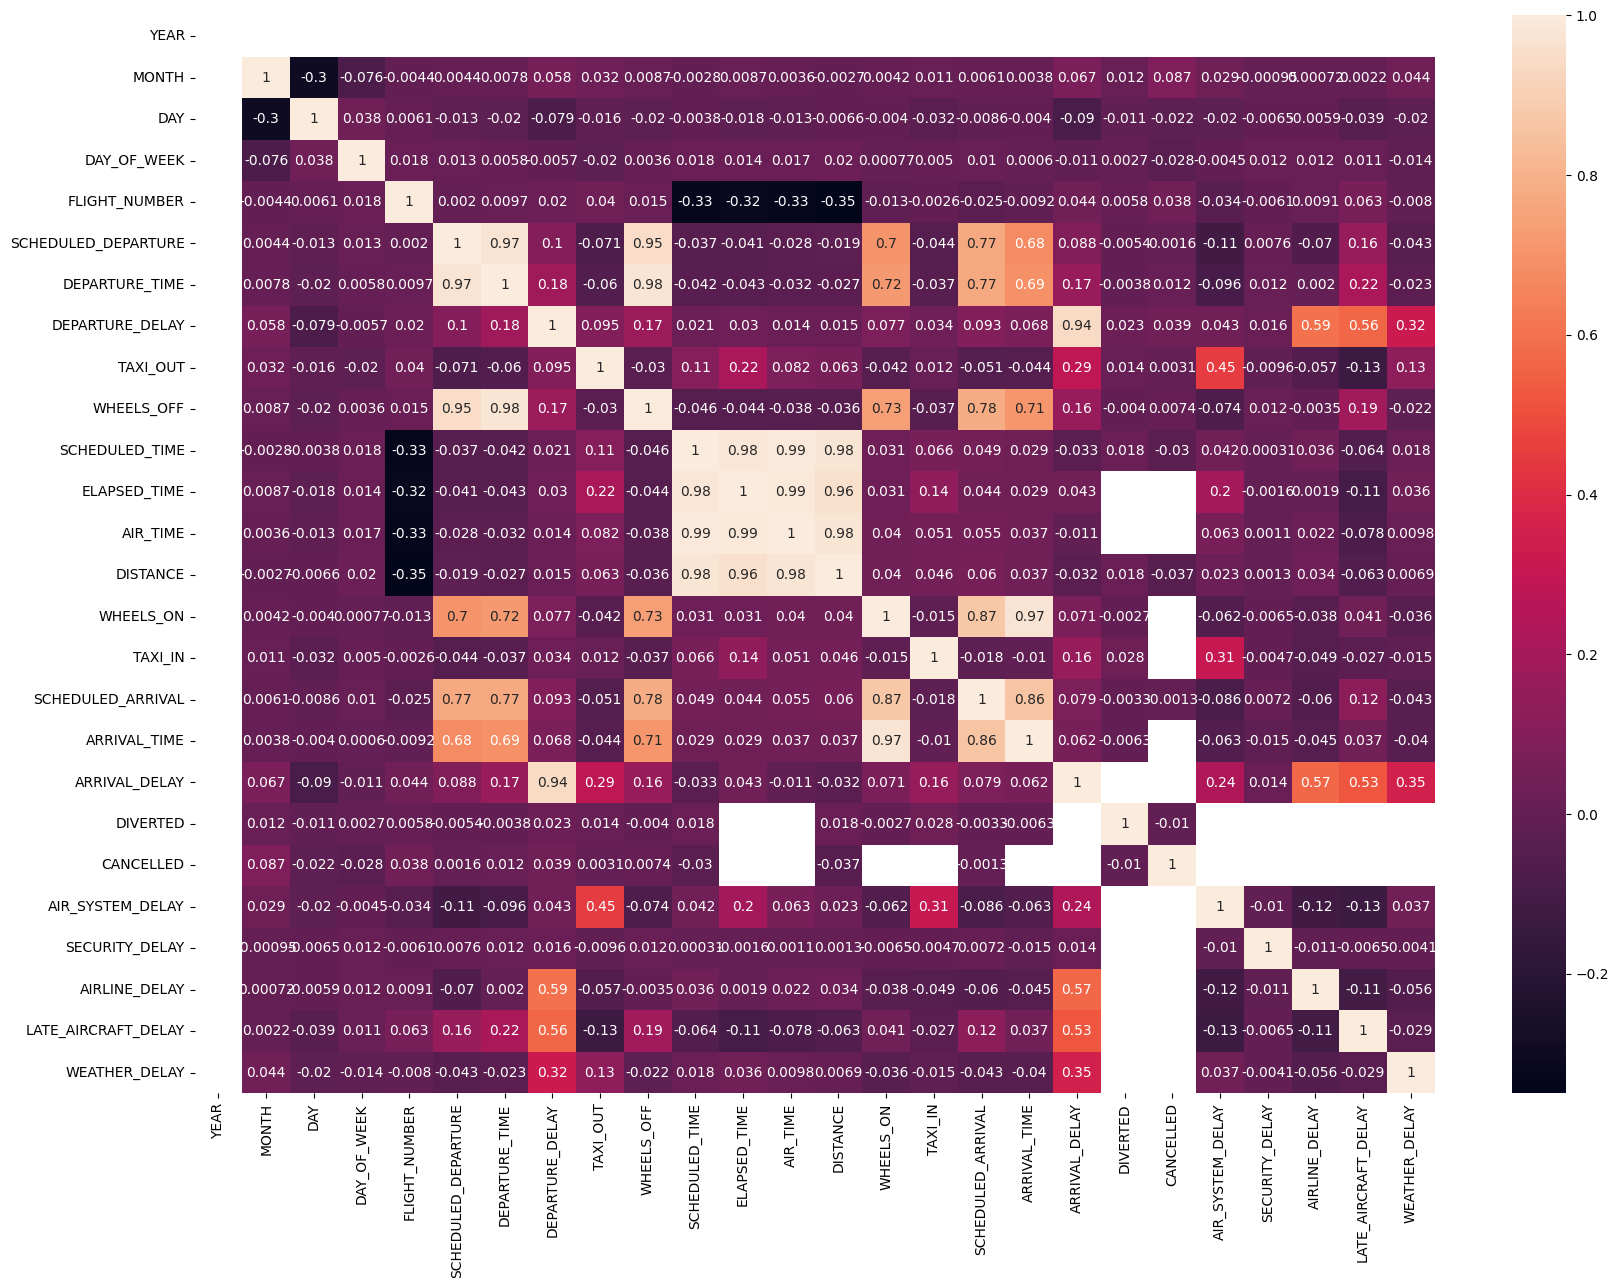

In [ ]:
# Select only numerical columns before calculating correlation
numerical_flights = flights.select_dtypes(include=['number'])

# Plot the heatmap using the numerical data
axis = plt.subplots(figsize=(20,14))
sns.heatmap(numerical_flights.corr(),annot = True)
plt.show()

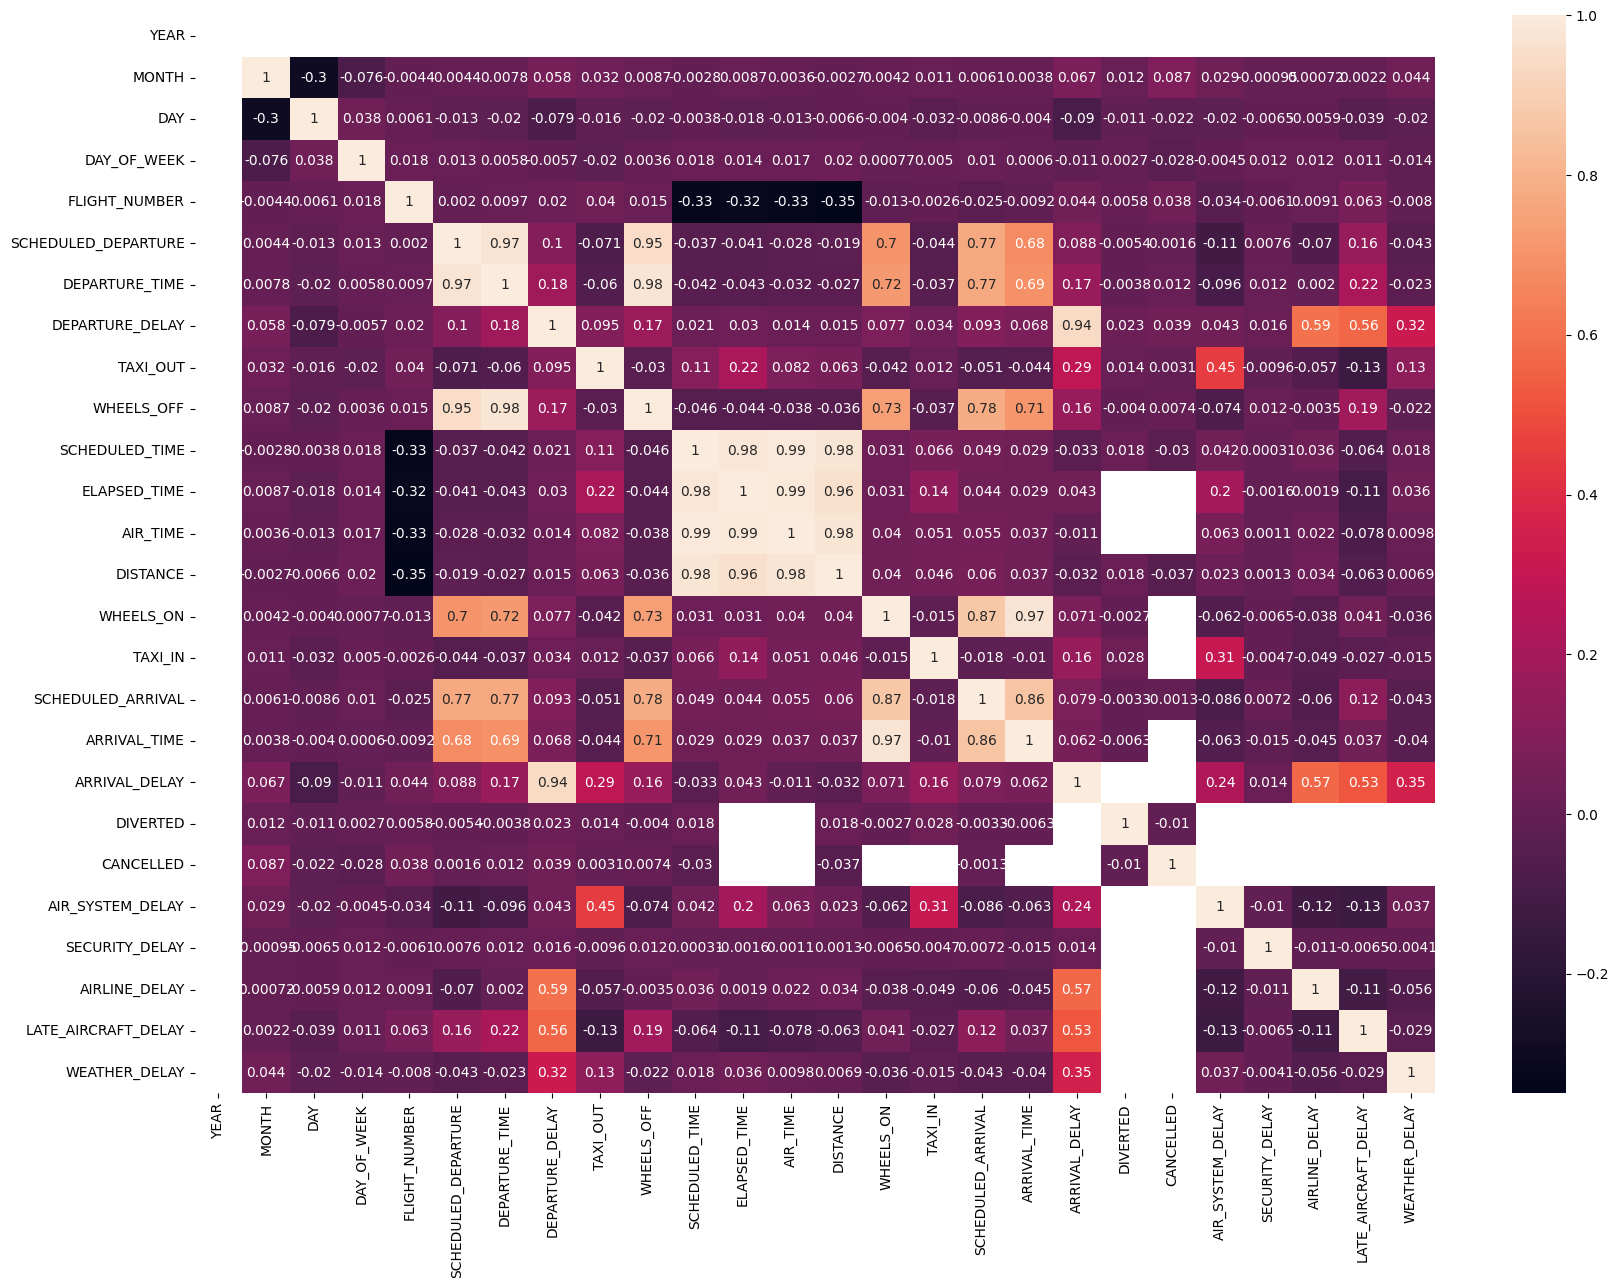

In [ ]:
axis = plt.subplots(figsize=(20,14))
sns.heatmap(numerical_flights.corr(),annot = True)
plt.show()

In [ ]:
corr=numerical_flights.corr()
corr

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,...,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
YEAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MONTH,NaN,1.000000,-0.298336,-0.076050,-0.004352,0.004421,0.007824,0.058382,0.031618,0.008672,...,0.006097,0.003776,0.067086,0.012448,0.086598,0.029196,-0.000952,0.000723,0.002219,0.044485
DAY,NaN,-0.298336,1.000000,0.037553,0.006070,-0.013451,-0.020436,-0.079239,-0.015586,-0.020468,...,-0.008645,-0.004040,-0.090476,-0.011288,-0.021800,-0.020282,-0.006453,-0.005867,-0.038924,-0.019998
DAY_OF_WEEK,NaN,-0.076050,0.037553,1.000000,0.017726,0.012503,0.005787,-0.005745,-0.020430,0.003585,...,0.010024,0.000601,-0.010888,0.002689,-0.028375,-0.004492,0.012499,0.012313,0.011426,-0.014421
FLIGHT_NUMBER,NaN,-0.004352,0.006070,0.017726,1.000000,0.002014,0.009711,0.019795,0.040144,0.014791,...,-0.024638,-0.009215,0.044402,0.005808,0.037722,-0.034227,-0.006072,0.009133,0.063184,-0.008027
SCHEDULED_DEPARTURE,NaN,0.004421,-0.013451,0.012503,0.002014,1.000000,0.969850,0.099596,-0.071482,0.947578,...,0.772431,0.677274,0.087902,-0.005383,0.001558,-0.114975,0.007568,-0.069689,0.157791,-0.042971
DEPARTURE_TIME,NaN,0.007824,-0.020436,0.005787,0.009711,0.969850,1.000000,0.180434,-0.059905,0.975104,...,0.771573,0.690762,0.165388,-0.003803,0.012399,-0.095680,0.012287,0.001988,0.216734,-0.022986
DEPARTURE_DELAY,NaN,0.058382,-0.079239,-0.005745,0.019795,0.099596,0.180434,1.000000,0.095434,0.172809,...,0.093052,0.067985,0.939331,0.022541,0.038623,0.042649,0.016015,0.594548,0.562844,0.320273
TAXI_OUT,NaN,0.031618,-0.015586,-0.020430,0.040144,-0.071482,-0.059905,0.095434,1.000000,-0.030362,...,-0.050798,-0.044219,0.287869,0.013604,0.003103,0.450740,-0.009624,-0.057418,-0.128740,0.133916
WHEELS_OFF,NaN,0.008672,-0.020468,0.003585,0.014791,0.947578,0.975104,0.172809,-0.030362,1.000000,...,0.779147,0.707751,0.164566,-0.003981,0.007408,-0.074495,0.011834,-0.003530,0.189424,-0.022441


In [ ]:
variables_to_remove=["YEAR","FLIGHT_NUMBER","TAIL_NUMBER","DEPARTURE_TIME","TAXI_OUT","WHEELS_OFF","ELAPSED_TIME","AIR_TIME","WHEELS_ON","TAXI_IN","ARRIVAL_TIME","DIVERTED","CANCELLED","CANCELLATION_REASON","AIR_SYSTEM_DELAY", "SECURITY_DELAY","AIRLINE_DELAY","LATE_AIRCRAFT_DELAY","WEATHER_DELAY","SCHEDULED_TIME","SCHEDULED_ARRIVAL"]
flights.drop(variables_to_remove,axis=1,inplace= True)
flights.columns

Index(['MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'ORIGIN_AIRPORT',
       'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE', 'DEPARTURE_DELAY',
       'DISTANCE', 'ARRIVAL_DELAY'],
      dtype='object')

In [ ]:
airport = pd.read_csv('/content/airports (1).csv')
airport

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447
...,...,...,...,...,...,...,...
317,WRG,Wrangell Airport,Wrangell,AK,USA,56.48433,-132.36982
318,WYS,Westerly State Airport,West Yellowstone,MT,USA,44.68840,-111.11764
319,XNA,Northwest Arkansas Regional Airport,Fayetteville/Springdale/Rogers,AR,USA,36.28187,-94.30681
320,YAK,Yakutat Airport,Yakutat,AK,USA,59.50336,-139.66023


In [ ]:
flights.loc[~flights.ORIGIN_AIRPORT.isin(airport.IATA_CODE.values),'ORIGIN_AIRPORT']='OTHER'
flights.loc[~flights.DESTINATION_AIRPORT.isin(airport.IATA_CODE.values),'DESTINATION_AIRPORT']='OTHER'
flights

,MONTH,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,DISTANCE,ARRIVAL_DELAY
575094,2,8,7,AA,RIC,DFW,650,-4.0,1158.0,-40.0
187717,1,13,2,EV,ATL,CAE,815,-5.0,192.0,-4.0
62050,1,4,7,DL,ATL,IND,2200,-2.0,432.0,-8.0
267034,1,18,7,OO,ASE,LAX,1410,-3.0,737.0,-10.0
165808,1,11,7,US,CLT,ROC,1805,-3.0,573.0,-1.0
...,...,...,...,...,...,...,...,...,...,...
239338,1,16,5,UA,EWR,MCO,1300,-4.0,937.0,-24.0
216627,1,15,4,WN,PIT,BWI,630,-5.0,210.0,-34.0
668787,2,14,6,WN,IND,TPA,600,-6.0,837.0,-26.0
805115,2,23,1,UA,BOS,IAD,540,-6.0,413.0,-11.0


In [ ]:
print(flights.ORIGIN_AIRPORT.nunique())
print(flights.DESTINATION_AIRPORT.nunique())
print(flights.AIRLINE.nunique())

315
312
14


In [ ]:
flights=flights.dropna()
flights

,MONTH,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,DISTANCE,ARRIVAL_DELAY
575094,2,8,7,AA,RIC,DFW,650,-4.0,1158.0,-40.0
187717,1,13,2,EV,ATL,CAE,815,-5.0,192.0,-4.0
62050,1,4,7,DL,ATL,IND,2200,-2.0,432.0,-8.0
267034,1,18,7,OO,ASE,LAX,1410,-3.0,737.0,-10.0
165808,1,11,7,US,CLT,ROC,1805,-3.0,573.0,-1.0
...,...,...,...,...,...,...,...,...,...,...
239338,1,16,5,UA,EWR,MCO,1300,-4.0,937.0,-24.0
216627,1,15,4,WN,PIT,BWI,630,-5.0,210.0,-34.0
668787,2,14,6,WN,IND,TPA,600,-6.0,837.0,-26.0
805115,2,23,1,UA,BOS,IAD,540,-6.0,413.0,-11.0


In [ ]:
flights.shape

(95683, 10)

In [ ]:
df=pd.DataFrame(flights)
df['DAY_OF_WEEK']= df['DAY_OF_WEEK'].apply(str)
df["DAY_OF_WEEK"].replace({"1":"SUNDAY", "2": "MONDAY", "3": "TUESDAY", "4":"WEDNESDAY", "5":"THURSDAY", "6":"FRIDAY", "7":"SATURDAY"},inplace=True)
flights

<ipython-input-83-601c43540c90>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["DAY_OF_WEEK"].replace({"1":"SUNDAY", "2": "MONDAY", "3": "TUESDAY", "4":"WEDNESDAY", "5":"THURSDAY", "6":"FRIDAY", "7":"SATURDAY"},inplace=True)


,MONTH,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,DISTANCE,ARRIVAL_DELAY
575094,2,8,7,AA,RIC,DFW,650,-4.0,1158.0,-40.0
187717,1,13,2,EV,ATL,CAE,815,-5.0,192.0,-4.0
62050,1,4,7,DL,ATL,IND,2200,-2.0,432.0,-8.0
267034,1,18,7,OO,ASE,LAX,1410,-3.0,737.0,-10.0
165808,1,11,7,US,CLT,ROC,1805,-3.0,573.0,-1.0
...,...,...,...,...,...,...,...,...,...,...
239338,1,16,5,UA,EWR,MCO,1300,-4.0,937.0,-24.0
216627,1,15,4,WN,PIT,BWI,630,-5.0,210.0,-34.0
668787,2,14,6,WN,IND,TPA,600,-6.0,837.0,-26.0
805115,2,23,1,UA,BOS,IAD,540,-6.0,413.0,-11.0


In [ ]:
dums = ['AIRLINE','ORIGIN_AIRPORT','DESTINATION_AIRPORT','DAY_OF_WEEK']
df_cat=pd.get_dummies(df[dums],drop_first=True)
df_cat

,AIRLINE_AS,AIRLINE_B6,AIRLINE_DL,AIRLINE_EV,AIRLINE_F9,AIRLINE_HA,AIRLINE_MQ,AIRLINE_NK,AIRLINE_OO,AIRLINE_UA,...,DESTINATION_AIRPORT_WRG,DESTINATION_AIRPORT_XNA,DESTINATION_AIRPORT_YAK,DESTINATION_AIRPORT_YUM,DAY_OF_WEEK_MONDAY,DAY_OF_WEEK_SATURDAY,DAY_OF_WEEK_SUNDAY,DAY_OF_WEEK_THURSDAY,DAY_OF_WEEK_TUESDAY,DAY_OF_WEEK_WEDNESDAY
575094,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
187717,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
62050,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
267034,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False
165808,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239338,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
216627,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
668787,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
805115,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,True,False,False,False


In [ ]:
df_cat.columns

Index(['AIRLINE_AS', 'AIRLINE_B6', 'AIRLINE_DL', 'AIRLINE_EV', 'AIRLINE_F9',
       'AIRLINE_HA', 'AIRLINE_MQ', 'AIRLINE_NK', 'AIRLINE_OO', 'AIRLINE_UA',
       ...
       'DESTINATION_AIRPORT_WRG', 'DESTINATION_AIRPORT_XNA',
       'DESTINATION_AIRPORT_YAK', 'DESTINATION_AIRPORT_YUM',
       'DAY_OF_WEEK_MONDAY', 'DAY_OF_WEEK_SATURDAY', 'DAY_OF_WEEK_SUNDAY',
       'DAY_OF_WEEK_THURSDAY', 'DAY_OF_WEEK_TUESDAY', 'DAY_OF_WEEK_WEDNESDAY'],
      dtype='object', length=644)

In [ ]:
df.columns

Index(['MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'ORIGIN_AIRPORT',
       'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE', 'DEPARTURE_DELAY',
       'DISTANCE', 'ARRIVAL_DELAY'],
      dtype='object')

In [ ]:
var_to_remove=["DAY_OF_WEEK","AIRLINE","ORIGIN_AIRPORT","DESTINATION_AIRPORT"]
df.drop(var_to_remove,axis=1,inplace=True)
df

,MONTH,DAY,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,DISTANCE,ARRIVAL_DELAY
575094,2,8,650,-4.0,1158.0,-40.0
187717,1,13,815,-5.0,192.0,-4.0
62050,1,4,2200,-2.0,432.0,-8.0
267034,1,18,1410,-3.0,737.0,-10.0
165808,1,11,1805,-3.0,573.0,-1.0
...,...,...,...,...,...,...
239338,1,16,1300,-4.0,937.0,-24.0
216627,1,15,630,-5.0,210.0,-34.0
668787,2,14,600,-6.0,837.0,-26.0
805115,2,23,540,-6.0,413.0,-11.0


In [ ]:
data=pd.concat([df,df_cat],axis=1)
data

,MONTH,DAY,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,DISTANCE,ARRIVAL_DELAY,AIRLINE_AS,AIRLINE_B6,AIRLINE_DL,AIRLINE_EV,...,DESTINATION_AIRPORT_WRG,DESTINATION_AIRPORT_XNA,DESTINATION_AIRPORT_YAK,DESTINATION_AIRPORT_YUM,DAY_OF_WEEK_MONDAY,DAY_OF_WEEK_SATURDAY,DAY_OF_WEEK_SUNDAY,DAY_OF_WEEK_THURSDAY,DAY_OF_WEEK_TUESDAY,DAY_OF_WEEK_WEDNESDAY
575094,2,8,650,-4.0,1158.0,-40.0,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
187717,1,13,815,-5.0,192.0,-4.0,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
62050,1,4,2200,-2.0,432.0,-8.0,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False
267034,1,18,1410,-3.0,737.0,-10.0,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
165808,1,11,1805,-3.0,573.0,-1.0,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239338,1,16,1300,-4.0,937.0,-24.0,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
216627,1,15,630,-5.0,210.0,-34.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
668787,2,14,600,-6.0,837.0,-26.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
805115,2,23,540,-6.0,413.0,-11.0,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [ ]:
data.shape

(95683, 650)

In [ ]:
final_data = data.sample(n=60000)
final_data

,MONTH,DAY,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,DISTANCE,ARRIVAL_DELAY,AIRLINE_AS,AIRLINE_B6,AIRLINE_DL,AIRLINE_EV,...,DESTINATION_AIRPORT_WRG,DESTINATION_AIRPORT_XNA,DESTINATION_AIRPORT_YAK,DESTINATION_AIRPORT_YUM,DAY_OF_WEEK_MONDAY,DAY_OF_WEEK_SATURDAY,DAY_OF_WEEK_SUNDAY,DAY_OF_WEEK_THURSDAY,DAY_OF_WEEK_TUESDAY,DAY_OF_WEEK_WEDNESDAY
409456,1,27,2040,-1.0,581.0,-4.0,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False
880457,2,27,1550,145.0,213.0,156.0,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
344825,1,23,1355,-1.0,690.0,-5.0,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
671554,2,14,900,5.0,1303.0,-22.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
966610,3,5,850,-4.0,1020.0,1.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354753,1,24,830,-8.0,2586.0,2.0,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
110497,1,8,600,-8.0,67.0,-15.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
766458,2,20,1115,18.0,1481.0,-3.0,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
72320,1,5,1459,0.0,650.0,-2.0,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [ ]:
final_data.shape

(60000, 650)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [ ]:
X=final_data.drop("DEPARTURE_DELAY",axis=1)
Y=final_data.DEPARTURE_DELAY

In [ ]:
X

,MONTH,DAY,SCHEDULED_DEPARTURE,DISTANCE,ARRIVAL_DELAY,AIRLINE_AS,AIRLINE_B6,AIRLINE_DL,AIRLINE_EV,AIRLINE_F9,...,DESTINATION_AIRPORT_WRG,DESTINATION_AIRPORT_XNA,DESTINATION_AIRPORT_YAK,DESTINATION_AIRPORT_YUM,DAY_OF_WEEK_MONDAY,DAY_OF_WEEK_SATURDAY,DAY_OF_WEEK_SUNDAY,DAY_OF_WEEK_THURSDAY,DAY_OF_WEEK_TUESDAY,DAY_OF_WEEK_WEDNESDAY
409456,1,27,2040,581.0,-4.0,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,False
880457,2,27,1550,213.0,156.0,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
344825,1,23,1355,690.0,-5.0,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
671554,2,14,900,1303.0,-22.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
966610,3,5,850,1020.0,1.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354753,1,24,830,2586.0,2.0,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
110497,1,8,600,67.0,-15.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
766458,2,20,1115,1481.0,-3.0,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
72320,1,5,1459,650.0,-2.0,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [ ]:
Y

,DEPARTURE_DELAY
409456,-1.0
880457,145.0
344825,-1.0
671554,5.0
966610,-4.0
...,...
354753,-8.0
110497,-8.0
766458,18.0
72320,0.0


In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train,y_train)

RandomForestRegressor()

In [ ]:
y_pred = reg_rf.predict(X_test)
y_pred

array([  5.86,  18.25,  -6.57, ..., 102.22,  48.98,  24.64])

In [ ]:
reg_rf.score(X_train,y_train)

0.9888421580881598

In [ ]:
reg_rf.score(X_test,y_test)

0.9153455795191805

In [ ]:
metrics.r2_score(y_test,y_pred)

0.9153455795191805

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test,y_pred))
print('MSE:', metrics.mean_squared_error(y_test,y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE: 6.755241666666667
MSE: 121.96098825000001
RMSE: 11.043594897043263


In [ ]:
pp=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
pp

,Actual,Predicted
846019,24.0,5.86
726608,33.0,18.25
306074,-6.0,-6.57
678380,-4.0,-1.98
808342,0.0,3.85
...,...,...
664843,32.0,19.84
137769,-1.0,7.51
167455,65.0,102.22
908254,55.0,48.98


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [ ]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [ ]:
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1, error_score='raise')

In [ ]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': ['sqrt',"auto"], # Change 'auto' to 'sqrt'
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [ ]:
# Random search of parameters, using 5 fold cross validation,search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [ ]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=148; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=148; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=148; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=148; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=148; total time=   0.0s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=182; total time=   0.0s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=182; total time=   0.0s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
30 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['sqrt', 'auto'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [10, 27, 44, 61, 79, 96,
                                                         113, 130, 148, 165,
                                                         182, 200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [ ]:
rf_random.best_params_

{'n_estimators': 113,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 20}

In [ ]:
# Import necessary libraries
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

# Assuming you have your X_train and y_train data ready

# Create a RandomForestRegressor instance (if you haven't already)
reg_rf = RandomForestRegressor()

# Define the parameter grid (using the corrected random_grid from previous response)
random_grid = {
    'n_estimators': n_estimators,
    'max_features': ['sqrt'],
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf
}

# Create the RandomizedSearchCV object
rf_random = RandomizedSearchCV(estimator=reg_rf, param_distributions=random_grid,
                               scoring='neg_mean_squared_error', n_iter=10, cv=5,
                               verbose=2, random_state=42, n_jobs=1)

# Fit the model to the training data
rf_random.fit(X_train, y_train)

# Get the best model from the search
best_rf_model = rf_random.best_estimator_

# Now you can use best_rf_model to make predictions:
predictions = best_rf_model.predict(X_test)  # Assuming you have X_test data

# Evaluate the model using R-squared score
from sklearn.metrics import r2_score
r2 = r2_score(y_test, predictions)  # Assuming you have y_test data
print("R-squared score:", r2)

# Strategies to potentially improve R-squared:

# 1. Increase n_iter in RandomizedSearchCV:
#    - Explore more hyperparameter combinations by increasing n_iter.
#    - For example: rf_random = RandomizedSearchCV(..., n_iter=50, ...)

# 2. Expand the hyperparameter search space:
#    - Widen the ranges or add more options for the hyperparameters in random_grid.

# 3. Feature engineering:
#    - Create new features or transform existing ones that might be more predictive.

# 4. Try different models:
#    - Experiment with other regression algorithms (e.g., Gradient Boosting, XGBoost).

# 5. More data (if possible):
#    - Having more data often helps improve model performance.

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=182; total time=  17.2s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=182; total time=  17.9s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=182; total time=  18.1s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=182; total time=  18.7s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=182; total time=  18.2s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=148; total time=  11.5s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=148; total time=  12.6s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimator

In [ ]:
p=rf_random.predict(X_test)
p

array([ 4.90316927, 14.54076181,  0.17937184, ..., 67.62301351,
       36.21380439, 16.20776626])

In [ ]:
metrics.r2_score(y_test,p)

0.6892363451981675

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test,p))
print('MSE:', metrics.mean_squared_error(y_test,p))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,p)))

MAE: 11.913452406938557
MSE: 447.71486517234814
RMSE: 21.159273739246064


In [ ]:
zz=pd.DataFrame({'Actual':y_test,'Predicted':p})
zz

,Actual,Predicted
846019,24.0,4.903169
726608,33.0,14.540762
306074,-6.0,0.179372
678380,-4.0,3.889441
808342,0.0,6.450609
...,...,...
664843,32.0,21.707490
137769,-1.0,4.103752
167455,65.0,67.623014
908254,55.0,36.213804


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor(random_state=0)

In [ ]:
GBR=gbr.fit(X_train,y_train)
pre=GBR.predict(X_test)

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test,pre))
print('MSE:', metrics.mean_squared_error(y_test,pre))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,pre)))

MAE: 6.8175804018606625
MSE: 117.61440877349095
RMSE: 10.845017693553615


In [ ]:
metrics.r2_score(y_test,pre)

0.9183625866124934

In [ ]:
gg=pd.DataFrame({'Actual':y_test,'Predicted':pre})
gg

,Actual,Predicted
846019,24.0,10.013686
726608,33.0,22.455070
306074,-6.0,-6.442326
678380,-4.0,-2.463317
808342,0.0,-1.546489
...,...,...
664843,32.0,24.288560
137769,-1.0,3.619012
167455,65.0,90.531800
908254,55.0,61.990735


In [ ]:
def predict(MONTH, DAY,SCHEDULED_DEPARTURE,DISTANCE, ARRIVAL_DELAY,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DAY_OF_WEEK):
    AIRLINE_index = np.where(X.columns==AIRLINE)[0][0]
    ORIGIN_index = np.where(X.columns==ORIGIN_AIRPORT)[0][0]
    DESTINATION_index = np.where(X.columns==DESTINATION_AIRPORT)[0][0]
    DAY_OF_WEEK_index = np.where(X.columns==DAY_OF_WEEK)[0][0]
    x= np.zeros(len(X.columns))
    x[0] = MONTH
    x[1] = DAY
    x[2] = SCHEDULED_DEPARTURE
    x[3] = DISTANCE
    x[4] = ARRIVAL_DELAY
    if AIRLINE_index >=0:
        x[AIRLINE_index] = 1
    if ORIGIN_index >=0:
        x[ORIGIN_index] = 1
    if DESTINATION_index >=0:
        x[DESTINATION_index] = 1
    if  DAY_OF_WEEK_index >= 0:
        x[ DAY_OF_WEEK_index] = 1

    return gbr.predict([x])[0]

In [ ]:
res= predict(5,6,1515,328,-8.0,'AIRLINE_OO','ORIGIN_AIRPORT_PHX','DESTINATION_AIRPORT_ABQ','DAY_OF_WEEK_TUESDAY')
res

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


-4.097333650544566

In [ ]:
if(res<=-15):
  print("Flight is delayed")
else:
  print("Flight is not delayed")

Flight is not delayed
